# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('salary_dataset.csv')

data

,age,experience,gpa,degree,position,salary
0,30.0,7.0,3.94,bachelor,engineer,32500.0
1,26.0,2.0,2.86,bachelor,NaN,22500.0
2,27.0,0.0,3.13,doctorate,secretary,37000.0
3,32.0,NaN,3.10,bachelor,engineer,24500.0
4,24.0,1.0,3.81,bachelor,accountant,23500.0
...,...,...,...,...,...,...
85,31.0,1.0,2.79,master,engineer,34000.0
86,NaN,5.0,3.27,doctorate,secretary,36000.0
87,28.0,7.0,2.64,doctorate,secretary,38000.0
88,26.0,1.0,2.52,bachelor,secretary,NaN


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         89 non-null     float64
 1   experience  89 non-null     float64
 2   gpa         90 non-null     float64
 3   degree      90 non-null     object 
 4   position    89 non-null     object 
 5   salary      89 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.3+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,age,experience,gpa,salary
count,86.000000,86.000000,86.000000,86.000000
mean,28.023256,3.848837,3.278605,31348.837209
std,4.408486,3.702201,0.528937,9255.227384
min,21.000000,0.000000,2.540000,13000.000000
25%,24.000000,1.000000,2.820000,24500.000000
50%,28.000000,3.000000,3.260000,30500.000000
75%,32.000000,7.000000,3.640000,37375.000000
max,35.000000,13.000000,5.880000,54000.000000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'salary'
feature_name = list(data.columns.drop(target_name))

In [8]:
X = data[feature_name]
y = data[target_name]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [10]:
numerical_feature = ['age', 'experience', 'gpa']
categorical_feature = ['degree', 'position']

In [11]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

degree : ['bachelor' 'doctorate' 'master']
position : ['accountant' 'engineer' 'secretary']


In [12]:
ordinal_feature = ['degree']
nominal_feature = ['position']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [13]:
categories = [
    np.array(['bachelor', 'master', 'doctorate'], dtype=object),
]

In [14]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [15]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [17]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [18]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [19]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

## ### 5.3. Feature Scaling

# 6. Model Creation

## 6.1. Setting Parameters

In [20]:
reg = LinearRegression()

## 6.2. Train Model

In [21]:
reg.fit(X_train, y_train)

LinearRegression()

## 6.3. Model's Weight & Bias

In [22]:
reg.coef_

array([  145.89133481,  1116.01333067,  1879.9773525 ,  7214.84841696,
        -242.90928578,  3029.43836259, -2786.52907682])

In [23]:
reg.intercept_

11076.72744495793

# 7. Prediction

## 7.1. Training Set

In [24]:
y_pred_train = reg.predict(X_train)

In [25]:
y_pred_train

array([39059.84951795, 23876.89613354, 51297.12823932, 26803.22185888,
       23244.53052638, 32429.33880017, 31344.79411495, 18766.67753311,
       37361.60341445, 33901.44121663, 24751.70329169, 22448.23544336,
       17689.44007702, 21945.02631385, 39914.36973748, 39858.09328846,
       23061.93410219, 35983.67232393, 33844.243363  , 38209.35285593,
       43803.47410279, 17445.0430212 , 16806.6230813 , 20338.38952233,
       45218.97465713, 24615.36651436, 36709.12888103, 40732.85134931,
       26686.90363724, 29842.4390406 , 46049.79368426, 22437.80708243,
       51670.93669573, 30082.19365838, 19972.18287801, 31423.939856  ,
       21190.83763128, 31839.22863811, 36135.19061024, 31896.89356817,
       42977.44103947, 30145.57866995, 29973.54420574, 43026.49623033,
       33271.10362526, 33702.1099353 , 32204.79574768, 40672.25601291,
       33460.64883986, 47010.76914813, 35247.25339947, 26424.26701433,
       30415.72506355, 31222.28873537, 49526.57545886, 32222.0508013 ,
      

## 7.2. Test Set

In [26]:
y_pred_test = reg.predict(X_test)

In [27]:
y_pred_test

array([31991.94666561, 22559.61943036, 26363.36084036, 28672.9857634 ,
       26621.51402353, 27416.76427885, 29626.49499983, 46704.28959081,
       31452.15454445, 22613.93723825, 21078.81135008, 35697.95471454,
       34389.93004476, 29414.08126704, 43040.82605104, 21840.58835782,
       17459.33594133, 29069.63101085])

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [28]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8741990417707302
mean_squared_error =		 11359059.316376839
mean_absolute_error =		 2887.790067813865
mean_absolute_percentage_error = 0.10135679565377134


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

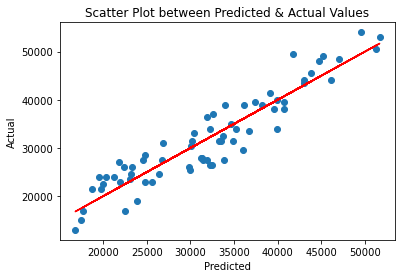

In [29]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [30]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.8566472339642186
mean_squared_error =		 8039258.515031318
mean_absolute_error =		 2243.178604587211
mean_absolute_percentage_error = 0.08143661535643623


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

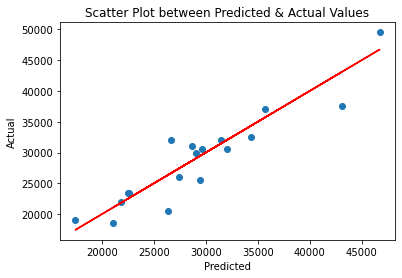

In [31]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [32]:
import pickle

In [33]:
pickle.dump((reg, 
             ordinal_encoder, 
             one_hot_encoder, 
             feature_name, 
             numerical_feature, 
             ordinal_feature, 
             nominal_feature),  open('linear_regrssion_model.pickle', 'wb'))